In [1]:
from os import chdir; chdir('../')
from lib.app import Q
from lib.helpers.database_helper import pull_actions
from lib.helpers.database_helper import pull_and_shape_batch
from lib.helpers.database_helper import pull_training_and_test_sets
from lib.helpers.pipeline_helper import initialize_training_session
from lib.helpers.pipeline_helper import prepare_plot_of_loss_function
from lib.helpers.pipeline_helper import train_via_gradient_descent
from lib.helpers.redis_helper import get_best_loss, get_weights_matrix, set_best_loss, set_weights_matrix
from lib.helpers.redis_helper import get_training_count, init_training_count, incr_training_count
from lib.nn.functions import measure_accuracy, predict, random_matrix
from numpy import mean

In [2]:
training_set, test_set = pull_training_and_test_sets()

At this point, we modified our performance metrics from a simple average to use Accuracy and F1 Score. 

## Gradient Descent

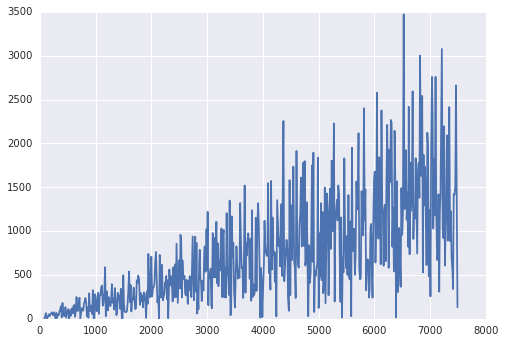

In [3]:
n = int(len(training_set)/10)
initialize_training_session()

for i in range(n):
    Q.enqueue(train_via_gradient_descent,
              action_ids=training_set[i*10:(i+1)*10],
              gamma=0.001)

training_counts, loss_values = prepare_plot_of_loss_function(length=n)    

In [4]:
weights_matrix = get_weights_matrix()
features, outcomes = pull_and_shape_batch(action_ids=test_set)
measure_accuracy(weights_matrix, features, outcomes)

0.42180000000000001

In [3]:
b = [['this123','this','this'],['thing123','thing','thing']]

In [6]:
[item
 for sublist in b
 for item in sublist
 if item is not 'this']

SyntaxError: invalid syntax (<ipython-input-6-31c68775ed60>, line 3)

In [5]:
[item
 if item is not 'this'
 else 'that'
 for sublist in b
 for item in sublist
 ]

['this123', 'that', 'that', 'thing123', 'thing', 'thing']